In [2]:

import numpy as np
import matplotlib.pyplot as plt
# from ROI_extraction import preprocess_image
import cv2
import os
import sys
sys.path.append("..")
from common_functions import HSV_features_generation

In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_text
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import xgboost as xgb

def eval_XGBoost(X,y,num_rounds,max_depth,k,min_samples_split=2, min_samples_leaf=1,learning_rate=show_forest=False):
    # Initialize a list to store the accuracy scores
    accuracy_scores = []
    val_accuracy_scores = []
    confusion_matrixs = []
    val_confusion_matrixs = []
    
    # Nombre de plis pour la validation croisée k-fold
    k = 4

    # Créer une instance de StratifiedKFold avec k plis
    skf = StratifiedKFold(n_splits=k)

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        print(f"Fold {i}:")
        # Diviser les données d'entraînement et de validation pour ce pli
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]

        y_train, y_val = y[train_index], y[test_index]

        # Créer l'objet DMatrix pour les données d'entraînement et de test
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_val, label=y_val)
        
        # Définir les paramètres du modèle XGBoost
        params = {
            'objective': 'multi:softmax',  # Fonction objective pour la classification binaire
            'max_depth': max_depth,  # Profondeur maximale de chaque arbre
            'num_class': 3
        }
        
        model = xgb.train(params, dtrain, num_rounds)

        # Prédiction sur les données de test
        y_train_pred = model.predict(dtrain)
        y_val_pred = model.predict(dtest)


        # Calculate the accuracy score
        accuracy = metrics.accuracy_score(y_train, y_train_pred)
        val_accuracy = metrics.accuracy_score(y_val, y_val_pred)

        confusion_mat = confusion_matrix(y_train, y_train_pred)
        confusion_mat_val = confusion_matrix(y_val, y_val_pred)

        print(f'Fold {i} accuracy : {accuracy}, val accuracy :{val_accuracy}')

        # Append the accuracy score to the list
        accuracy_scores.append(accuracy)
        val_accuracy_scores.append(val_accuracy)
        confusion_matrixs.append(confusion_mat)
        val_confusion_matrixs.append(confusion_mat_val)

    # Compute the average accuracy across all folds
    print('-------------------')
    print(f"Train accuracy : {np.mean(accuracy_scores)}")
    print(f"Val accuracy : {np.mean(val_accuracy_scores)}")

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Vraie étiquette')
    ax.set_title('Matrice de confusion')
    print('Average confusion matrix')
    sns.heatmap(np.mean(confusion_matrixs, axis=0), annot=True, cmap="Blues", ax=ax, fmt='.0f')
    plt.show()

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Vraie étiquette')
    ax.set_title('Matrice de confusion val')
    print('Average val confusion matrix')
    sns.heatmap(np.mean(val_confusion_matrixs, axis=0), annot=True, cmap="Blues", ax=ax, fmt='.0f')
    plt.show()

    return np.mean(accuracy_scores),np.mean(val_accuracy_scores)



In [4]:
#raw
X,y = HSV_features_generation('../images/raw_pollub/')


Fold 0:
Fold 0 accuracy : 0.9550173010380623, val accuracy :0.922585794094174
Fold 1:
Fold 1 accuracy : 0.9441043385680064, val accuracy :0.9481245011971269
Fold 2:
Fold 2 accuracy : 0.9505055880787653, val accuracy :0.9305111821086262
Fold 3:
Fold 3 accuracy : 0.9600851516764236, val accuracy :0.9257188498402555
-------------------
Train accuracy : 0.9524280948403144
Val accuracy : 0.9317350818100456
Average confusion matrix


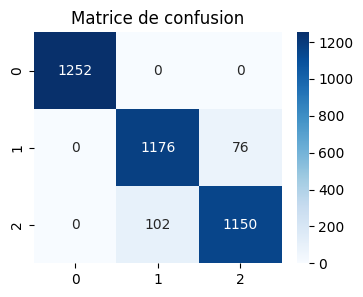

Average val confusion matrix


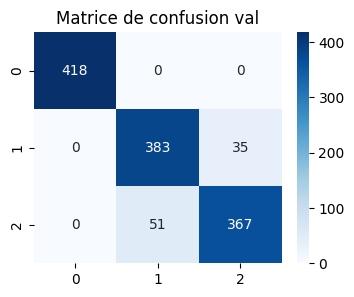

Fold 0:
Fold 0 accuracy : 0.9773755656108597, val accuracy :0.9481245011971269
Fold 1:
Fold 1 accuracy : 0.9803034335906308, val accuracy :0.960095770151636
Fold 2:
Fold 2 accuracy : 0.9805747738158594, val accuracy :0.9464856230031949
Fold 3:
Fold 3 accuracy : 0.979776476849388, val accuracy :0.9536741214057508
-------------------
Train accuracy : 0.9795075624666845
Val accuracy : 0.9520950039394271
Average confusion matrix


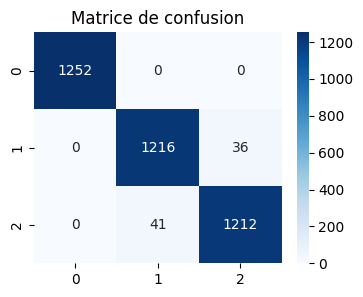

Average val confusion matrix


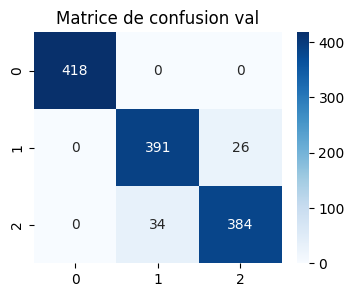

Fold 0:
Fold 0 accuracy : 0.9888208677136012, val accuracy :0.9553072625698324
Fold 1:
Fold 1 accuracy : 0.9930795847750865, val accuracy :0.9648842777334398
Fold 2:
Fold 2 accuracy : 0.9938797232570517, val accuracy :0.9488817891373802
Fold 3:
Fold 3 accuracy : 0.9917509313464609, val accuracy :0.9536741214057508
-------------------
Train accuracy : 0.9918827767730501
Val accuracy : 0.9556868627116009
Average confusion matrix


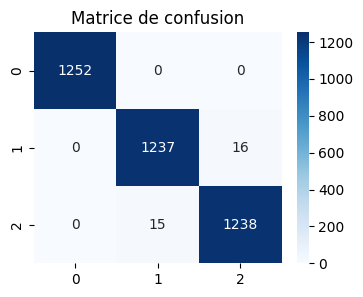

Average val confusion matrix


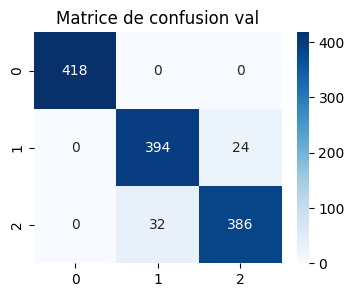

Fold 0:
Fold 0 accuracy : 0.9976044716529145, val accuracy :0.9577015163607342
Fold 1:
Fold 1 accuracy : 0.9994676603673144, val accuracy :0.9664804469273743
Fold 2:
Fold 2 accuracy : 0.9992017030335285, val accuracy :0.9528753993610224
Fold 3:
Fold 3 accuracy : 0.9986695050558808, val accuracy :0.9568690095846646
-------------------
Train accuracy : 0.9987358350274095
Val accuracy : 0.9584815930584489
Average confusion matrix


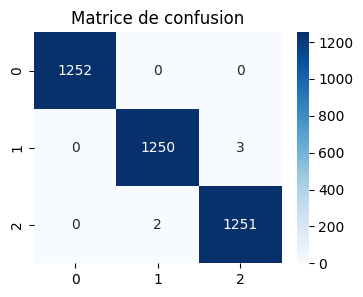

Average val confusion matrix


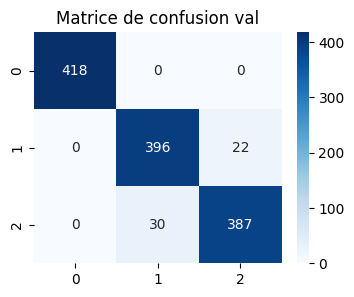

Fold 0:
Fold 0 accuracy : 0.9997338301836571, val accuracy :0.9624900239425379
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9680766161213089
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.952076677316294
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9552715654952076
-------------------
Train accuracy : 0.9999334575459142
Val accuracy : 0.9594787207188371
Average confusion matrix


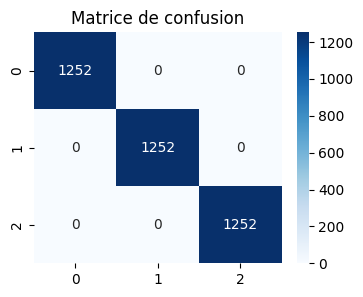

Average val confusion matrix


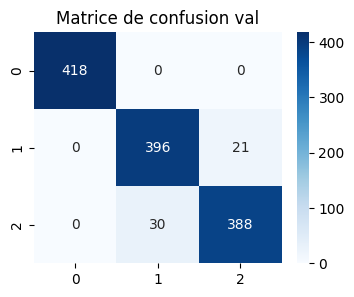

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9616919393455706
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9664804469273743
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9544728434504792
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9560702875399361
-------------------
Train accuracy : 1.0
Val accuracy : 0.9596788793158402
Average confusion matrix


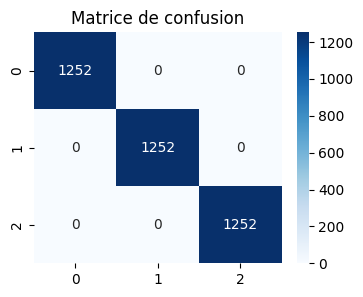

Average val confusion matrix


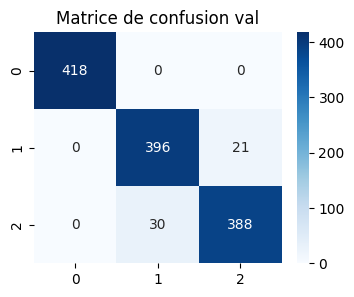

Fold 0:
Fold 0 accuracy : 0.9643332446100612, val accuracy :0.9393455706304868
Fold 1:
Fold 1 accuracy : 0.9614053766302901, val accuracy :0.9529130087789306
Fold 2:
Fold 2 accuracy : 0.9672698243746674, val accuracy :0.9424920127795527
Fold 3:
Fold 3 accuracy : 0.966205428419372, val accuracy :0.9337060702875399
-------------------
Train accuracy : 0.9648034685085977
Val accuracy : 0.9421141656191274
Average confusion matrix


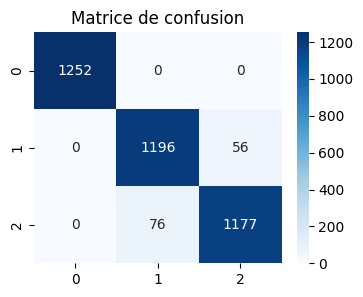

Average val confusion matrix


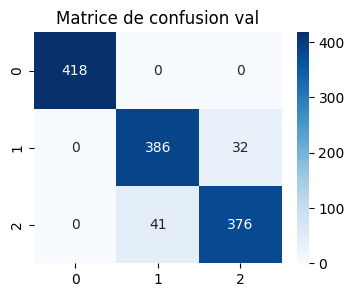

Fold 0:
Fold 0 accuracy : 0.9853606601011445, val accuracy :0.9608938547486033
Fold 1:
Fold 1 accuracy : 0.9914825658770295, val accuracy :0.9640861931364725
Fold 2:
Fold 2 accuracy : 0.9922831293241086, val accuracy :0.9536741214057508
Fold 3:
Fold 3 accuracy : 0.9896221394358702, val accuracy :0.9584664536741214
-------------------
Train accuracy : 0.9896871236845383
Val accuracy : 0.959280155741237
Average confusion matrix


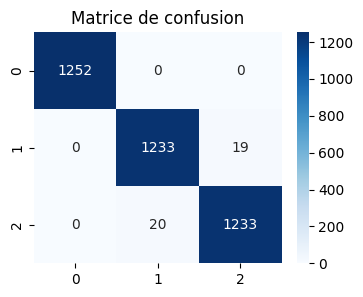

Average val confusion matrix


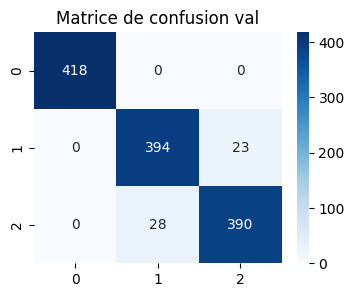

Fold 0:
Fold 0 accuracy : 0.998402981101943, val accuracy :0.960095770151636
Fold 1:
Fold 1 accuracy : 0.9997338301836571, val accuracy :0.965682362330407
Fold 2:
Fold 2 accuracy : 0.9994678020223523, val accuracy :0.9512779552715654
Fold 3:
Fold 3 accuracy : 0.9997339010111762, val accuracy :0.9600638977635783
-------------------
Train accuracy : 0.9993346285797822
Val accuracy : 0.9592799963792966
Average confusion matrix


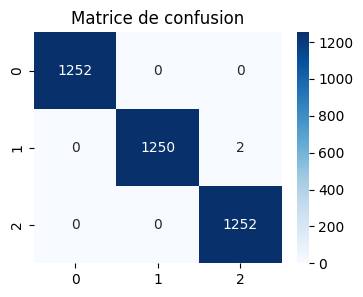

Average val confusion matrix


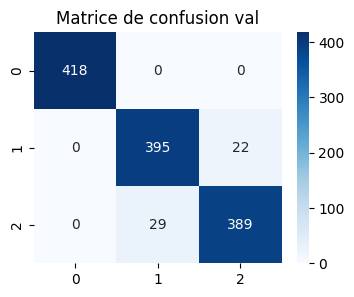

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9608938547486033
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9664804469273743
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9528753993610224
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9568690095846646
-------------------
Train accuracy : 1.0
Val accuracy : 0.9592796776554162
Average confusion matrix


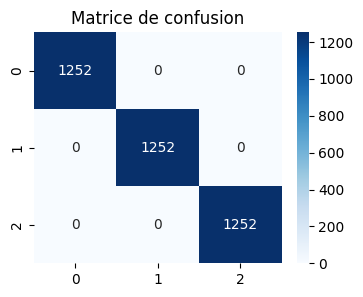

Average val confusion matrix


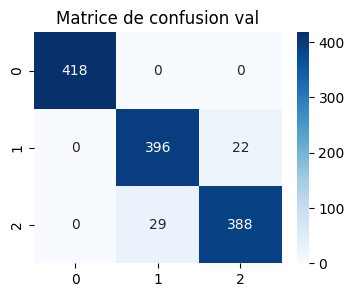

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9592976855546688
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9664804469273743
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9528753993610224
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9584664536741214
-------------------
Train accuracy : 1.0
Val accuracy : 0.9592799963792967
Average confusion matrix


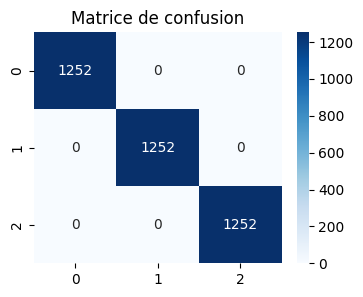

Average val confusion matrix


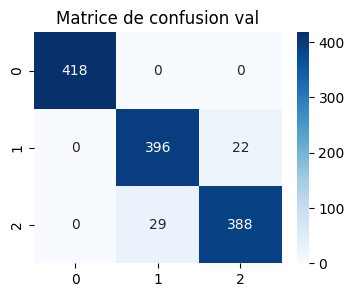

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9632881085395052
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9680766161213089
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9528753993610224
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9568690095846646
-------------------
Train accuracy : 1.0
Val accuracy : 0.9602772834016253
Average confusion matrix


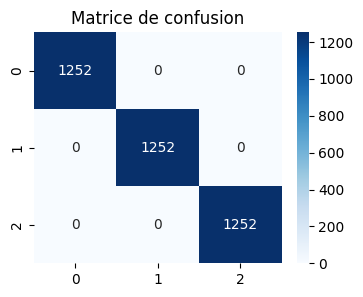

Average val confusion matrix


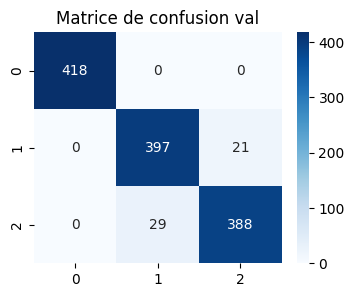

Fold 0:
Fold 0 accuracy : 0.9699228107532606, val accuracy :0.945730247406225
Fold 1:
Fold 1 accuracy : 0.9688581314878892, val accuracy :0.9577015163607342
Fold 2:
Fold 2 accuracy : 0.9736562001064396, val accuracy :0.9472843450479234
Fold 3:
Fold 3 accuracy : 0.9701969132517296, val accuracy :0.944888178913738
-------------------
Train accuracy : 0.9706585138998298
Val accuracy : 0.9489010719321551
Average confusion matrix


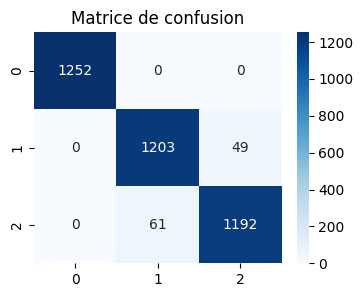

Average val confusion matrix


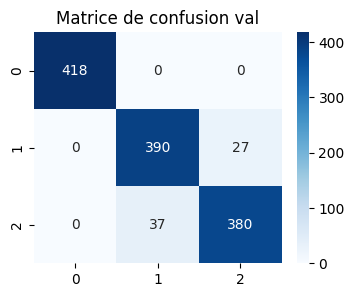

Fold 0:
Fold 0 accuracy : 0.9925472451424009, val accuracy :0.9648842777334398
Fold 1:
Fold 1 accuracy : 0.9962736225712004, val accuracy :0.965682362330407
Fold 2:
Fold 2 accuracy : 0.9957424161788185, val accuracy :0.9536741214057508
Fold 3:
Fold 3 accuracy : 0.9936136242682277, val accuracy :0.9616613418530351
-------------------
Train accuracy : 0.9945442270401619
Val accuracy : 0.9614755258306582
Average confusion matrix


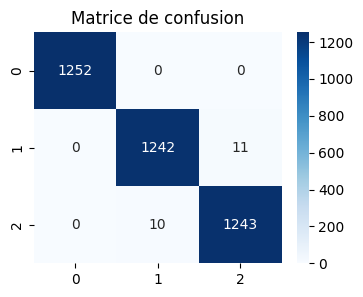

Average val confusion matrix


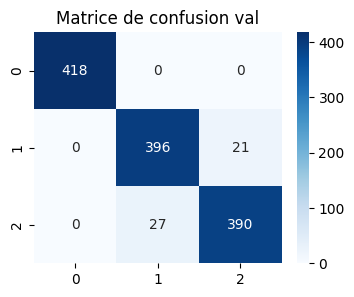

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.960095770151636
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9640861931364725
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.950479233226837
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9608626198083067
-------------------
Train accuracy : 1.0
Val accuracy : 0.958880954080813
Average confusion matrix


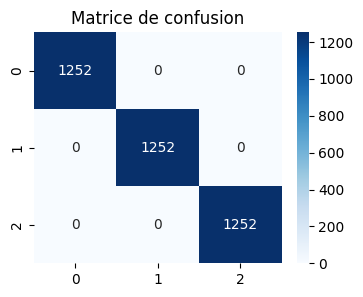

Average val confusion matrix


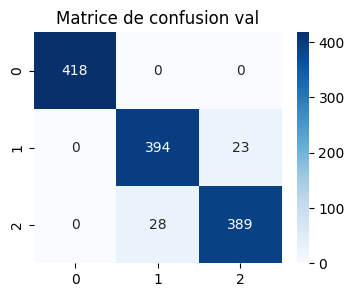

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9624900239425379
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9664804469273743
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.950479233226837
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9544728434504792
-------------------
Train accuracy : 1.0
Val accuracy : 0.9584806368868071
Average confusion matrix


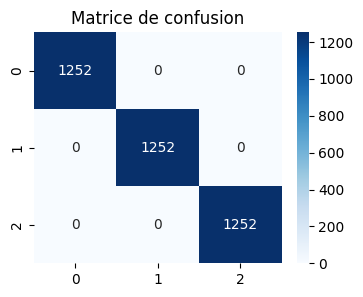

Average val confusion matrix


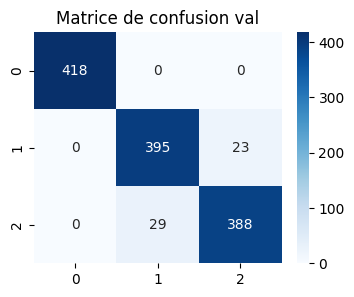

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9608938547486033
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9664804469273743
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9536741214057508
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.957667731629393
-------------------
Train accuracy : 1.0
Val accuracy : 0.9596790386777804
Average confusion matrix


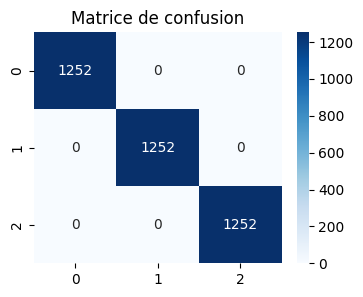

Average val confusion matrix


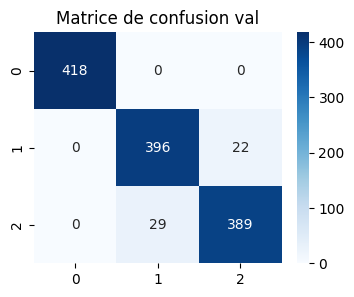

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.960095770151636
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9664804469273743
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9528753993610224
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9592651757188498
-------------------
Train accuracy : 1.0
Val accuracy : 0.9596791980397207
Average confusion matrix


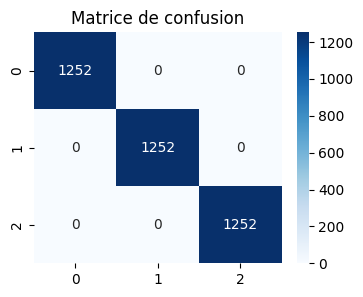

Average val confusion matrix


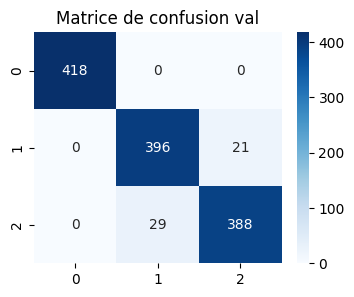

Fold 0:
Fold 0 accuracy : 0.9736491881820601, val accuracy :0.9521149241819633
Fold 1:
Fold 1 accuracy : 0.9760447165291456, val accuracy :0.9616919393455706
Fold 2:
Fold 2 accuracy : 0.9789781798829165, val accuracy :0.9496805111821086
Fold 3:
Fold 3 accuracy : 0.9744544970729111, val accuracy :0.950479233226837
-------------------
Train accuracy : 0.9757816454167584
Val accuracy : 0.9534916519841199
Average confusion matrix


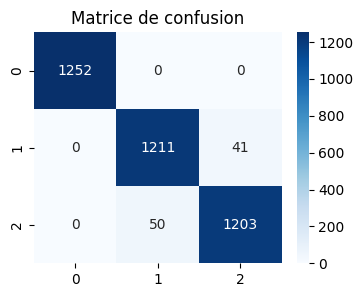

Average val confusion matrix


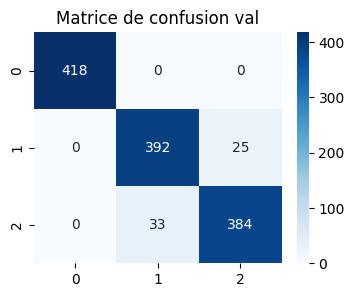

Fold 0:
Fold 0 accuracy : 0.9965397923875432, val accuracy :0.9648842777334398
Fold 1:
Fold 1 accuracy : 0.998402981101943, val accuracy :0.965682362330407
Fold 2:
Fold 2 accuracy : 0.9989356040447046, val accuracy :0.950479233226837
Fold 3:
Fold 3 accuracy : 0.9978712080894092, val accuracy :0.9608626198083067
-------------------
Train accuracy : 0.9979373964059001
Val accuracy : 0.9604771232747475
Average confusion matrix


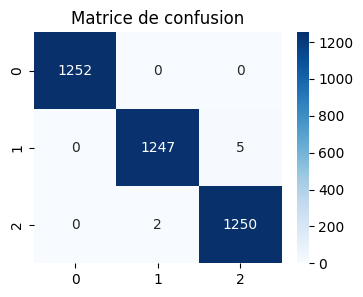

Average val confusion matrix


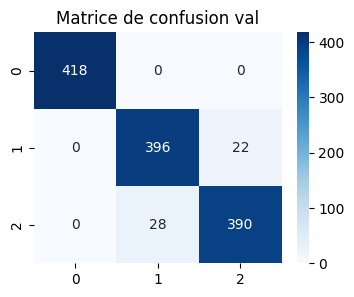

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9624900239425379
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9632881085395052
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.950479233226837
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9616613418530351
-------------------
Train accuracy : 1.0
Val accuracy : 0.9594796768904787
Average confusion matrix


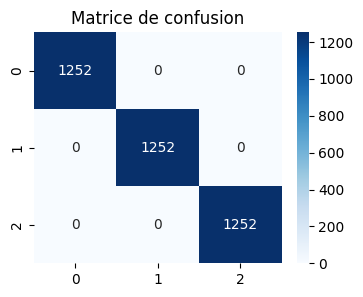

Average val confusion matrix


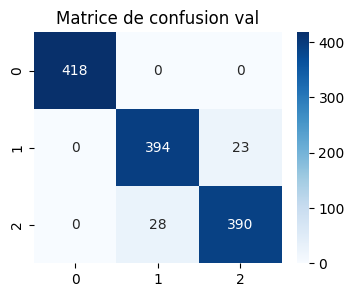

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9624900239425379
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9648842777334398
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9512779552715654
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9560702875399361
-------------------
Train accuracy : 1.0
Val accuracy : 0.9586806361218698
Average confusion matrix


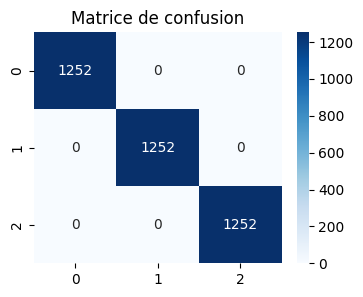

Average val confusion matrix


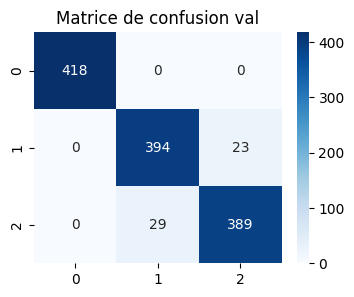

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.960095770151636
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9664804469273743
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9544728434504792
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9584664536741214
-------------------
Train accuracy : 1.0
Val accuracy : 0.9598788785509028
Average confusion matrix


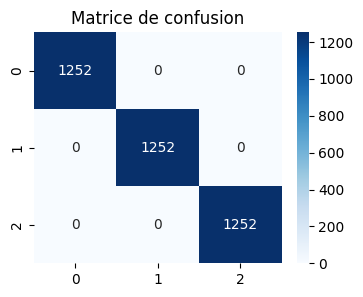

Average val confusion matrix


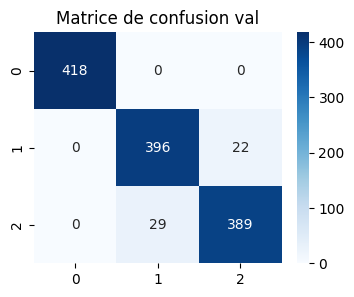

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9608938547486033
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9672785315243416
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9512779552715654
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9608626198083067
-------------------
Train accuracy : 1.0
Val accuracy : 0.9600782403382042
Average confusion matrix


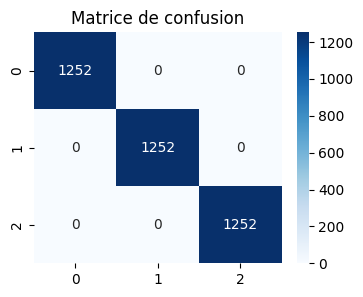

Average val confusion matrix


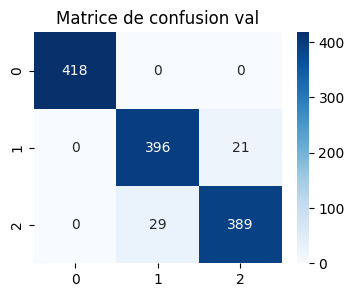

Fold 0:
Fold 0 accuracy : 0.9773755656108597, val accuracy :0.9537110933758979
Fold 1:
Fold 1 accuracy : 0.9813681128560021, val accuracy :0.9616919393455706
Fold 2:
Fold 2 accuracy : 0.9824374667376264, val accuracy :0.9496805111821086
Fold 3:
Fold 3 accuracy : 0.9789781798829165, val accuracy :0.9552715654952076
-------------------
Train accuracy : 0.9800398312718512
Val accuracy : 0.9550887773496962
Average confusion matrix


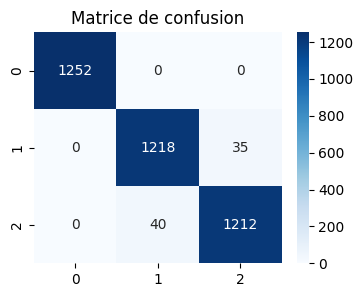

Average val confusion matrix


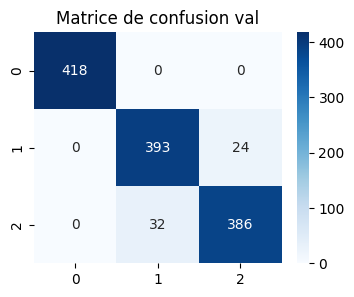

Fold 0:
Fold 0 accuracy : 0.998402981101943, val accuracy :0.9632881085395052
Fold 1:
Fold 1 accuracy : 0.9997338301836571, val accuracy :0.9640861931364725
Fold 2:
Fold 2 accuracy : 0.9997339010111762, val accuracy :0.9456869009584664
Fold 3:
Fold 3 accuracy : 0.9994678020223523, val accuracy :0.9608626198083067
-------------------
Train accuracy : 0.9993346285797822
Val accuracy : 0.9584809556106877
Average confusion matrix


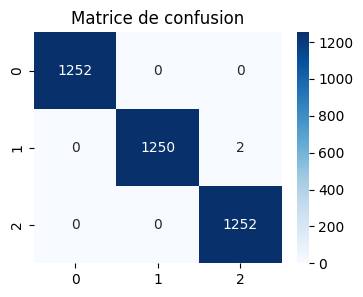

Average val confusion matrix


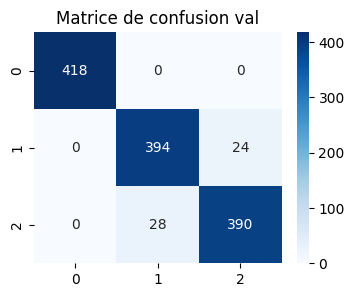

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9616919393455706
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9648842777334398
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9512779552715654
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9608626198083067
-------------------
Train accuracy : 1.0
Val accuracy : 0.9596791980397206
Average confusion matrix


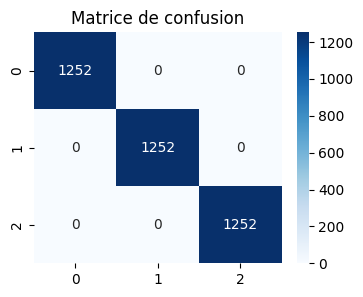

Average val confusion matrix


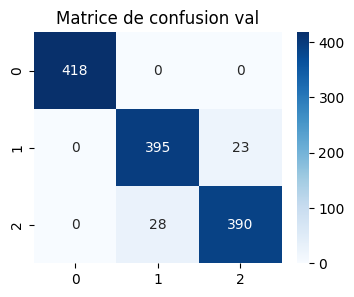

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9616919393455706
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9664804469273743
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9496805111821086
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9592651757188498
-------------------
Train accuracy : 1.0
Val accuracy : 0.9592795182934759
Average confusion matrix


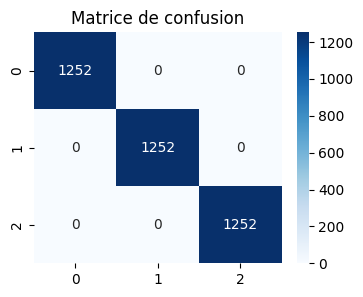

Average val confusion matrix


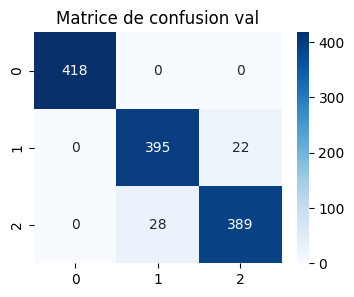

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.960095770151636
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9672785315243416
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9536741214057508
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9584664536741214
-------------------
Train accuracy : 1.0
Val accuracy : 0.9598787191889625
Average confusion matrix


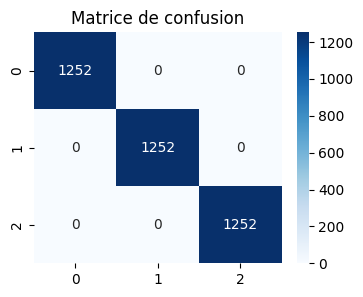

Average val confusion matrix


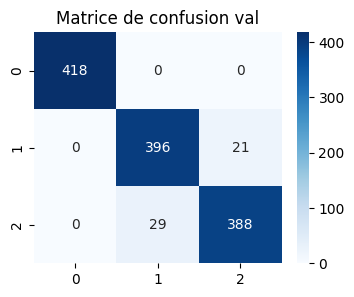

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.960095770151636
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9672785315243416
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.952076677316294
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9616613418530351
-------------------
Train accuracy : 1.0
Val accuracy : 0.9602780802113267
Average confusion matrix


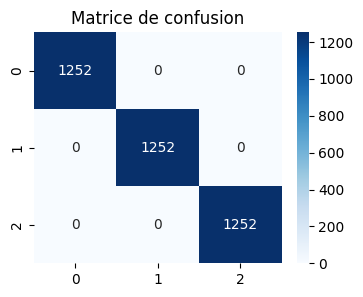

Average val confusion matrix


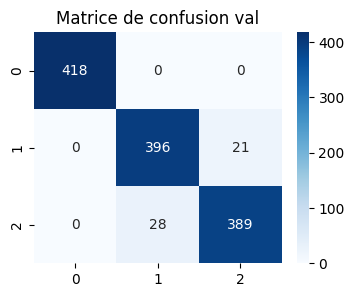

Fold 0:
Fold 0 accuracy : 0.9803034335906308, val accuracy :0.9584996009577015
Fold 1:
Fold 1 accuracy : 0.9829651317540591, val accuracy :0.9616919393455706
Fold 2:
Fold 2 accuracy : 0.9843001596593933, val accuracy :0.9488817891373802
Fold 3:
Fold 3 accuracy : 0.9827035657264502, val accuracy :0.9584664536741214
-------------------
Train accuracy : 0.9825680726826334
Val accuracy : 0.9568849457786934
Average confusion matrix


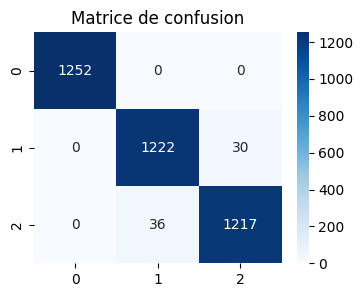

Average val confusion matrix


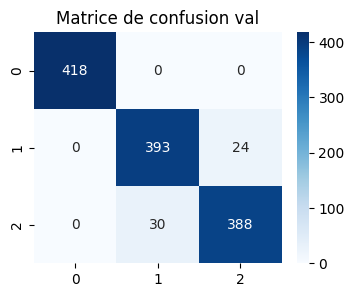

Fold 0:
Fold 0 accuracy : 0.9994676603673144, val accuracy :0.9608938547486033
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9632881085395052
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9464856230031949
Fold 3:
Fold 3 accuracy : 0.9997339010111762, val accuracy :0.9600638977635783
-------------------
Train accuracy : 0.9998003903446226
Val accuracy : 0.9576828710137204
Average confusion matrix


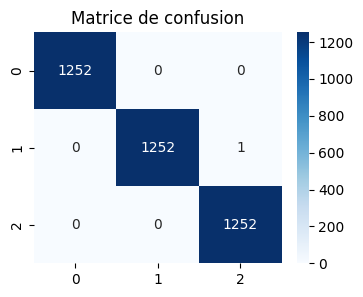

Average val confusion matrix


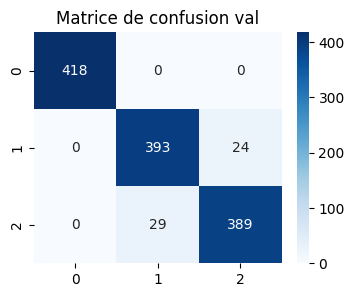

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9616919393455706
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9632881085395052
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9536741214057508
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9600638977635783
-------------------
Train accuracy : 1.0
Val accuracy : 0.9596795167636012
Average confusion matrix


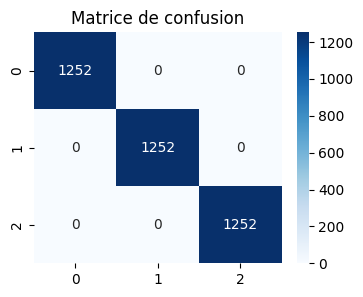

Average val confusion matrix


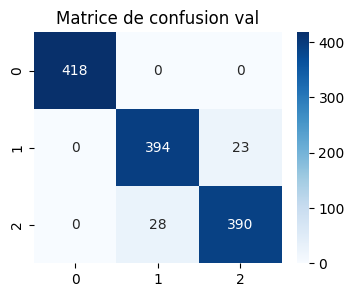

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9624900239425379
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.965682362330407
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9496805111821086
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9592651757188498
-------------------
Train accuracy : 1.0
Val accuracy : 0.9592795182934759
Average confusion matrix


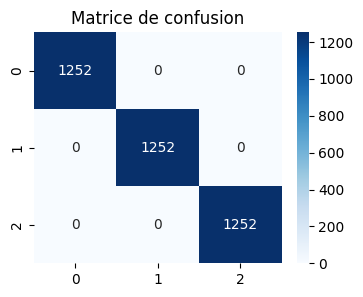

Average val confusion matrix


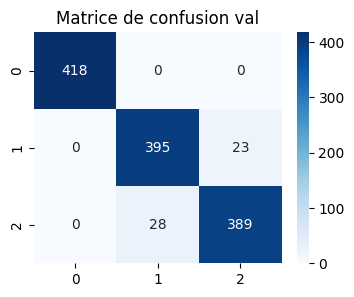

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.960095770151636
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9680766161213089
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9528753993610224
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9584664536741214
-------------------
Train accuracy : 1.0
Val accuracy : 0.9598785598270222
Average confusion matrix


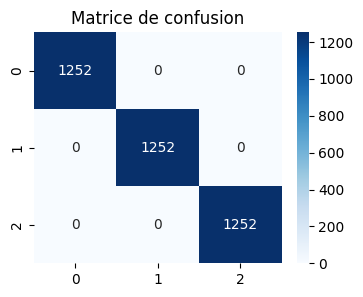

Average val confusion matrix


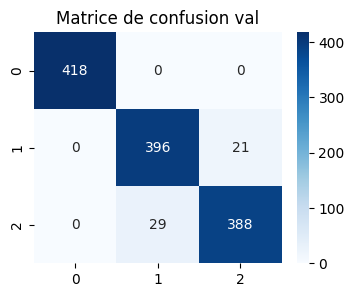

Fold 0:
Fold 0 accuracy : 1.0, val accuracy :0.9608938547486033
Fold 1:
Fold 1 accuracy : 1.0, val accuracy :0.9664804469273743
Fold 2:
Fold 2 accuracy : 1.0, val accuracy :0.9528753993610224
Fold 3:
Fold 3 accuracy : 1.0, val accuracy :0.9608626198083067
-------------------
Train accuracy : 1.0
Val accuracy : 0.9602780802113267
Average confusion matrix


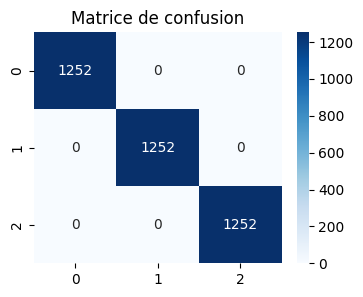

Average val confusion matrix


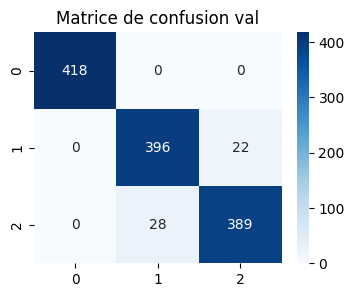

In [21]:
acc_train = []
acc_val = []
test_estimators = [50,100,150,200,250,300]

for nb_estimators in test_estimators:
    accuracies = []
    val_accuracies = []
    for max_depth in range(1,7):
        accuracy,val_accuracy = eval_XGBoost(X,y,nb_estimators,max_depth)
        accuracies.append(accuracy)
        val_accuracies.append(val_accuracy)
    acc_train.append(accuracies)
    acc_val.append(val_accuracies)


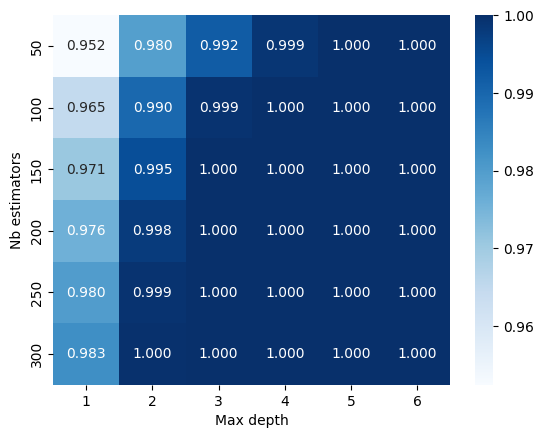

In [25]:
mat_acc_train = np.array(acc_train)
labels_x = range(1,7)
labels_y = test_estimators
sns.heatmap(mat_acc_train, annot=True, cmap="Blues", fmt='.3f', xticklabels=labels_x, yticklabels=labels_y)
plt.xlabel('Max depth')
plt.ylabel('Nb estimators')
plt.show()

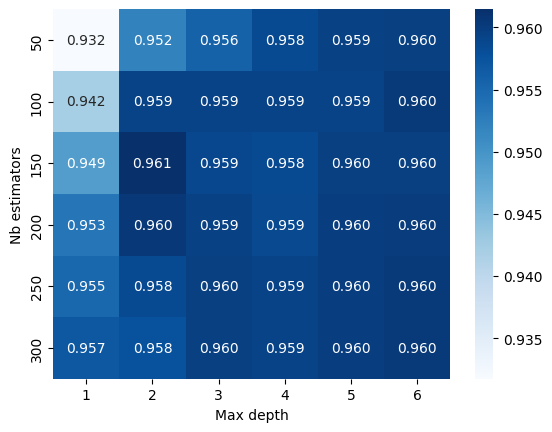

In [24]:
plt.clf()
mat_acc_val = np.array(acc_val)
labels_x = range(1,7)
labels_y = test_estimators
sns.heatmap(mat_acc_val, annot=True, cmap="Blues", fmt='.3f', xticklabels=labels_x, yticklabels=labels_y)
plt.xlabel('Max depth')
plt.ylabel('Nb estimators')
plt.show()

In [ ]:
#ROI
X,y = HSV_features_generation('../images/ROI_pollub/')